INTRODUCTION

-In linear regression we had continuous observations but in logistic regression,two discrete observations,true or false(0 or 1)
-Eg:email is spam or not spam
-Eg:online transactions are fraud or not fraud
-Eg:whether it is going to rain today or not ,to measure the amount of rain(in cms) then use Linear regression
-If probability is greater than 0.5 then its predicted as 1 and if its less than 0.5 then its predicted 0
-Cost function can be defined as the Sigmoid function

TITANIC DATASET-whether the person is going to survive or not in the crash based on their age,sex etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
#Load dataset

titanic=sns.load_dataset('titanic')
titanic.head(20)

#Understanding Data
#1.#survived is our target class
#2.sibsp-siblings
#3.parch-parents and children
#4.embark_town- boarding point

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [154]:
titanic.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'adult_male', 'alone'],
      dtype='object')

In [4]:
titanic.describe()

#Understanding Data
#1.tota survivors 891
#2.age of only 714 is given rest missing

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()
#drop deck since data is missing for 688 rows(if more than 50% of data is missing then drop the column)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

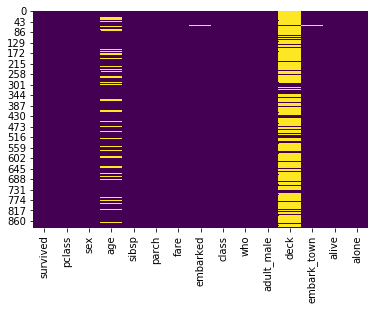

In [6]:
sns.heatmap((titanic.isnull()),cbar=False,cmap='viridis')

In [7]:
titanic['age'].isnull().sum()/titanic.shape[0]*100 #19% of age data is missing

19.865319865319865

In [8]:
titanic.shape[0]

891

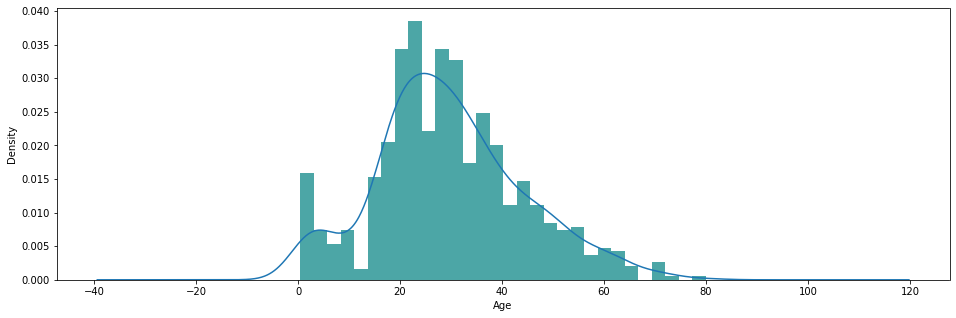

In [9]:
ax=titanic['age'].hist(bins=30,density=True,stacked=True,color='teal',alpha=0.7,figsize=(16,5))#distribution of age
                                                                                               #alpha-transperancy of the graph
titanic['age'].plot(kind='density')
ax.set_xlabel('Age')
plt.show()

In [10]:
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']
women.count()

survived       314
pclass         314
sex            314
age            261
sibsp          314
parch          314
fare           314
embarked       312
class          314
who            314
adult_male     314
deck            97
embark_town    312
alive          314
alone          314
dtype: int64

In [11]:
men.count()

survived       577
pclass         577
sex            577
age            453
sibsp          577
parch          577
fare           577
embarked       577
class          577
who            577
adult_male     577
deck           106
embark_town    577
alive          577
alone          577
dtype: int64

In [12]:
titanic['sex'].value_counts()
titanic['who'].value_counts()
#Total people=891
#Total adults=891-83=808
#Total children=83
#Male=577
#Female=314

man      537
woman    271
child     83
Name: who, dtype: int64

Text(0.5, 1.0, 'Female')

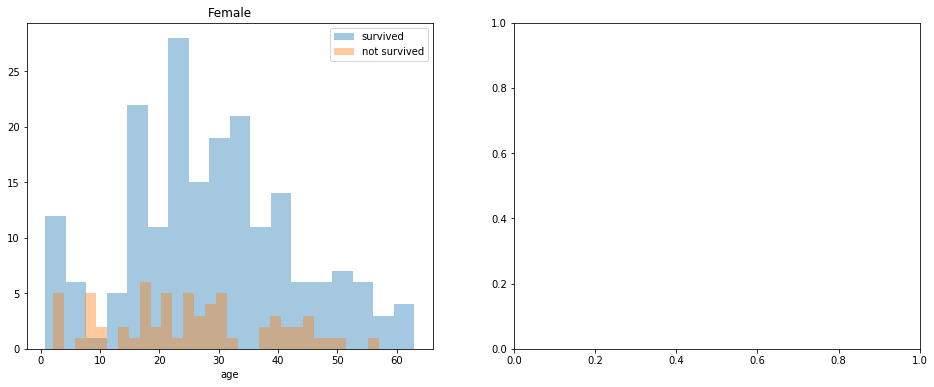

In [13]:
#How age and sex is related to survival of passengers?

survived='survived'
not_survived='not survived'

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,6))

ax=sns.distplot(women[women[survived]==1].age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women[survived]==0].age.dropna(),bins=30,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')



Observation:

1.Whether they are male or female,most of the childern have survived
2.Majority of the female have survived
3.between 18 to 30 years males have higher probability of survival


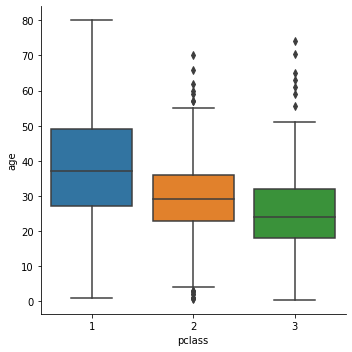

In [14]:
#CATEGORICAL PLOT
#pclass=1st class passenger,2nd class passenger and 3rd class passengers=3 categories 

sns.catplot(x='pclass',y='age',data=titanic,kind='box')

#Observations:
#1.Majority of 1st class passengers age is higher, between 28-48yrs
#2.Majority of 2nd class passangers age is between 25-35yrs
#3.Majority of 3rd class passangers age is between 18-30yrs

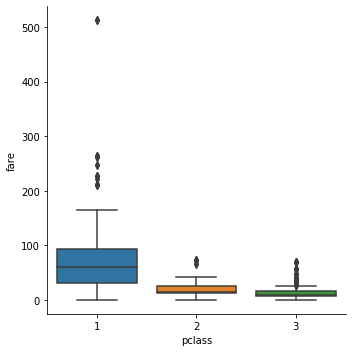

In [15]:
sns.catplot(x='pclass',y='fare',data=titanic,kind='box')

In [16]:
#MEAN AGE OF 1ST 2ND AND 3RD CLASS PASSANGER

titanic[titanic['pclass']==1]['age'].mean() #mean of age of passangers belonging to 1st class


38.233440860215055

In [17]:
titanic[titanic['pclass']==2]['age'].mean() #mean of age of passangers belonging to 2nd class


29.87763005780347

In [18]:
titanic[titanic['pclass']==3]['age'].mean() #mean of age of passangers belonging to 3rd class


25.14061971830986

FILL THE EMPTY AGE ROWS WITH THE MEAN VALUES OF 38,29.8 AND 25 FOR 1ST,2ND AND 3RD CLASS PASSANGERS

In [28]:
#FUNCTION

def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if titanic['age'].isnull:
        if pclass==1:
            return titanic[titanic['pclass']==1]['age'].mean() #38
        elif pclass==2:
                return titanic[titanic['pclass']==2]['age'].mean() #29
        elif pclass==3:
                return titanic[titanic['pclass']==3]['age'].mean() #25
        else:
            return age
        


In [29]:
titanic['age']=titanic[['age','pclass']].apply(impute_age, axis=1)

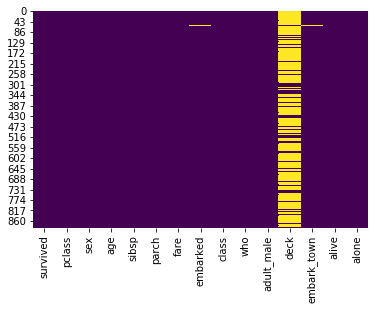

In [31]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')
#age group is filled

In [33]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,25.140620,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.233441,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,25.140620,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,38.233441,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,25.140620,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,25.140620,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,38.233441,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,25.140620,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,25.140620,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,29.877630,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


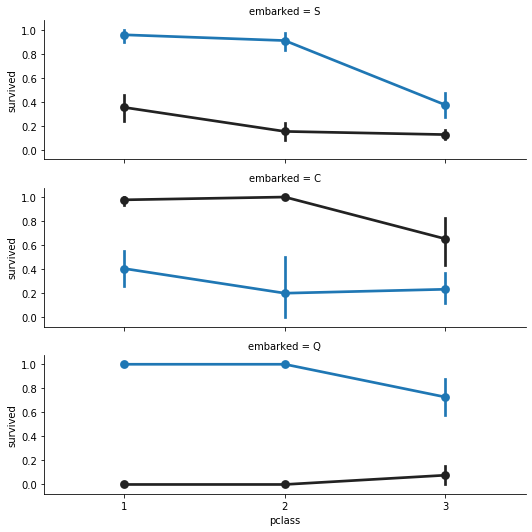

In [36]:
#Embarked has null values!
#FACET GRID

f=sns.FacetGrid(data=titanic,row='embarked',height =2.5,aspect=3)
f.map(sns.pointplot,'pclass','survived','sex',order=None,hue_order=None)
f.add_legend()

#Analysis:Survival rate of people belonging to all three clases based on their boarding location 
#1.The survival rate of females boarding from S and Q are high 
#2.Survival rate of males boarded from C is high


In [38]:
titanic['embarked'].isnull().sum() #2 empty embarked values

2

In [52]:
#Fill the empty space with the port name from which maximum people have boarded

titanic['embark_town'].value_counts() 

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [51]:
titanic['embarked'].value_counts() 

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [54]:
#max number of passangers have boarded from Southampton so we fill the null values in embarked with S & embark_town with Southampton

titanic['embarked'].fillna('S',inplace=True)

In [55]:
titanic['embarked'].isnull().sum() #crosschecking if null values are replaced or not

0

In [57]:
titanic['embark_town'].isnull().sum()

2

In [59]:
titanic['embark_town'].fillna('Southampton',inplace=True)

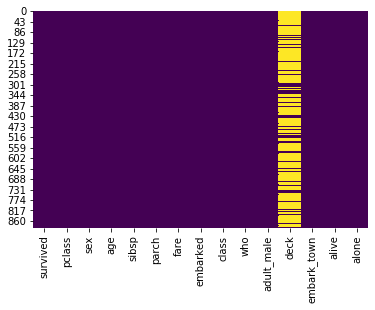

In [60]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [89]:
#We have to now drop unnecessary columns

titanic.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)

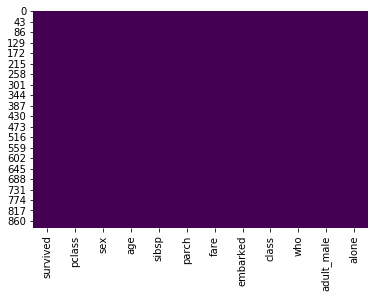

In [90]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [91]:
titanic.drop(labels=['who','class'],inplace=True,axis=1)

In [64]:
#FEATURE TRANSFORMATION

#Colums like embarked,class is all categorical values so we must change it into numerical values

#Step1:change age and fare from float to int

titanic['age']=titanic['age'].astype('int')
titanic['fare']=titanic['fare'].astype('int')

In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int32   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int32(2), int64(4), object(3)
memory usage: 58.5+ KB


In [79]:
#Step2: sex: map male n female to 0 and 1

genders={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(genders)

In [82]:
adult_male={True:1,False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [83]:
alone={True:1,False:0}
titanic['alone']=titanic['alone'].map(alone)

In [87]:
titanic['embarked']=titanic['embarked'].map({'S':0,'C':1,'Q':2})

In [92]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,25,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,25,0,0,7,0,0,1
3,1,1,1,38,1,0,53,0,0,0
4,0,3,0,25,0,0,8,0,1,1


In [97]:
#BUILD LOGISTIC REGRESSION MODEL
#Total 9 features and 1 target

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [98]:
X=titanic.drop('survived',axis=1)
y=titanic['survived']

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [102]:
X_train.shape

(596, 9)

In [103]:
y_train.shape

(596,)

In [104]:
X_test.shape

(295, 9)

In [106]:
y_test.shape

(295,)

#Total rows =891
#Training data=596
#Testing data=295

In [109]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [110]:
#Accuracy score
model.score(X_test,y_test) #it says the model has 82% accuracy

0.8203389830508474

#HOW TO SELECT FEATURES USING RECURSIVE FEATURE TECHNIQUES to increase accuracy

Step 1:Train the model using training data with al features
Step 2:Calculate model performance
Step 3:Rank all features according to their importance 
Step 4:Remove least important features
Step 5:Train the model with exsisting features
Step 6:Calculate the model performance
Step 7:Repeat all the steps untill only important features remain n the model performnce is high

In [113]:
from sklearn.feature_selection import RFE #Recursive feature elimination

In [115]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
rfe = RFE(model,5,verbose=1) #out of 9 features we will select only the top 5 important features 

In [116]:
rfe=rfe.fit(X,y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [117]:
rfe.support_ #means 1st,4th,5th,8th,9th features are important and the rest are unimportant

array([ True, False, False,  True,  True, False, False,  True,  True])

In [120]:
#select only the features that the rfe has chosen

XX=X[X.columns[rfe.support_]]
XX.head()


,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [123]:
#TRAIN MODEL AND CHECK ACCURACY AGAIN

X_train,X_test,y_train,y_test=train_test_split(XX,y,test_size=0.2,random_state=8,stratify=y)

In [124]:
X_train.shape

(712, 5)

In [125]:
X_test.shape

(179, 5)

In [129]:
y_train.shape

(712,)

In [127]:
y_test.shape

(179,)

#Total rows =891
#Training data=712
#Testing data=179

In [130]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [131]:
model.score(X_test,y_test) #improved model accuracy score

0.8547486033519553

In [140]:
#ACCURACY,PRECESION,RECALL,AUC_ROC Curve

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_auc_score,roc_curve,auc,log_loss

In [141]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [142]:
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1. 
#That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.

y_predict_prob=model.predict_proba(X_test)[:,1] #get y predition probability [:,1]- all rows of first column
                                                #checks the probability of all classes

In [144]:
#ROC: Compute Receiver operating characteristic (ROC) by using the function roc_curve()

[fpr,tpr,thr]=roc_curve(y_test,y_predict_prob)


In [145]:
#Accuracy

print('Accuracy',accuracy_score(y_test,y_predict))


Accuracy 0.8547486033519553


In [146]:
#LOG LOSS??????

print('Log Loss',log_loss(y_test,y_predict_prob))


Log Loss 0.36597373727139876


In [147]:
#AUC????

print('AUC',auc(fpr,tpr))

AUC 0.9007246376811595


In [148]:
idx=np.min(np.where(tpr>0.95))
idx

27

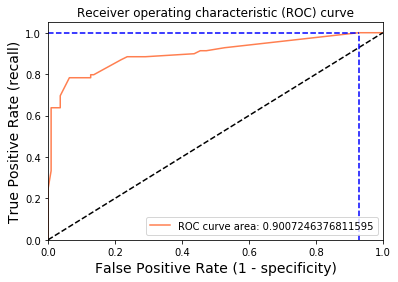

Using a threshold of 0.094 guarantees a sensitivity of 1.000 and a specificity of 0.073, i.e. a false positive rate of 92.73%.


In [153]:
#??????????????????????????????????????????????????????????????????????????????????????????????????

plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))

plt.plot([0, 1], [0, 1], 'k--')

plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')

plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))
